In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime, date

In [2]:
"""
    Data Source : https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand
    Dataset link : https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv
"""

bikeData = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv", encoding='latin1')

In [3]:
bikeData.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
# Overview of Data
bikeData.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [5]:
# Counting null values
bikeData.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [6]:
# inspecting column names
bikeData.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
# rename the column names, which is more convinient
bikeData.rename(columns={
    "Rented Bike Count": "rented_bike_count", "Temperature(∞C)": "celcious_temperature", "Humidity(%)": "percentage_humidity", 
    "Wind speed (m/s)": "wind_speed", "Visibility (10m)": "visibility", "Dew point temperature(∞C)": "dew_point_temperature_celcious",
    "Solar Radiation (MJ/m2)": "solar_radiation", "Rainfall(mm)": "rainfall", "Snowfall (cm)": "snowfall_cm", "Seasons": "seasons",
    "Holiday": "holiday", "Hour":"hour", "Date": "date", "Functioning Day": "functional_day"
}, inplace=True)

bikeData.columns

Index(['date', 'rented_bike_count', 'hour', 'Temperature(°C)',
       'percentage_humidity', 'wind_speed', 'visibility',
       'Dew point temperature(°C)', 'solar_radiation', 'rainfall',
       'snowfall_cm', 'seasons', 'holiday', 'functional_day'],
      dtype='object')

In [8]:
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
date                         8760 non-null object
rented_bike_count            8760 non-null int64
hour                         8760 non-null int64
Temperature(°C)              8760 non-null float64
percentage_humidity          8760 non-null int64
wind_speed                   8760 non-null float64
visibility                   8760 non-null int64
Dew point temperature(°C)    8760 non-null float64
solar_radiation              8760 non-null float64
rainfall                     8760 non-null float64
snowfall_cm                  8760 non-null float64
seasons                      8760 non-null object
holiday                      8760 non-null object
functional_day               8760 non-null object
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


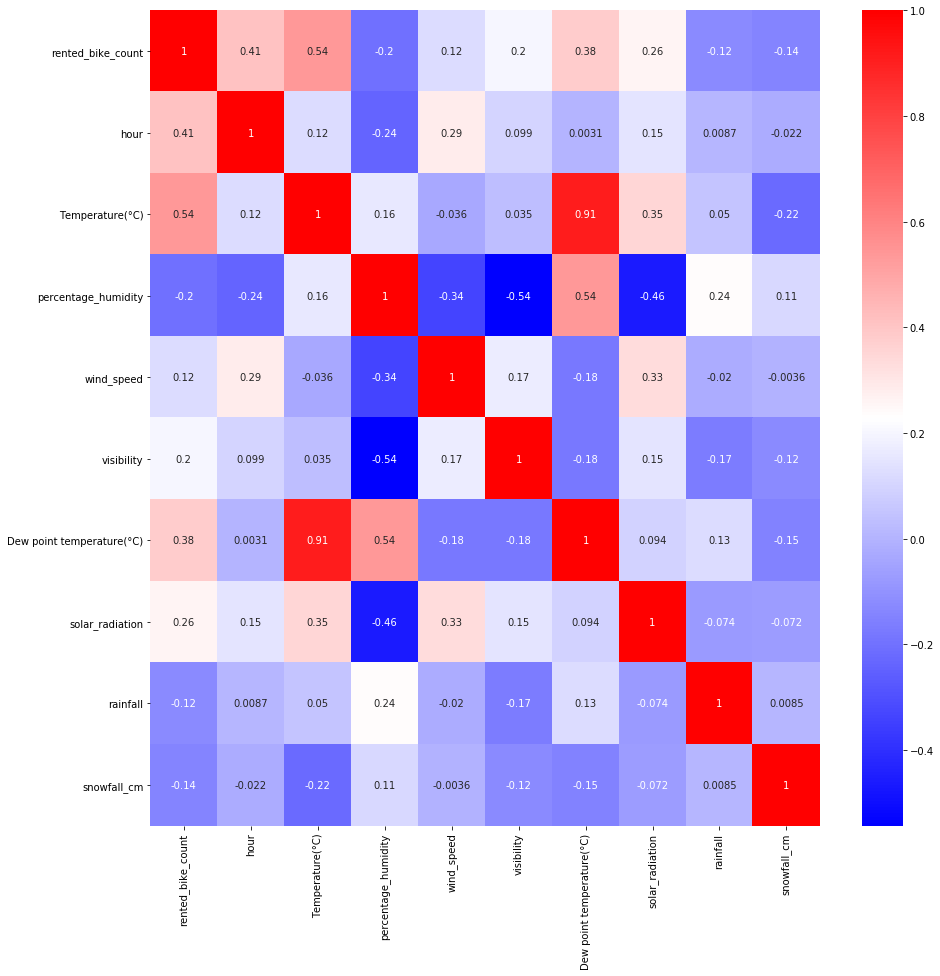

In [9]:
# Take ta look on correlation matrix
plt.figure(figsize=(15,15))
ax = sns.heatmap(bikeData.corr(), cmap='bwr', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

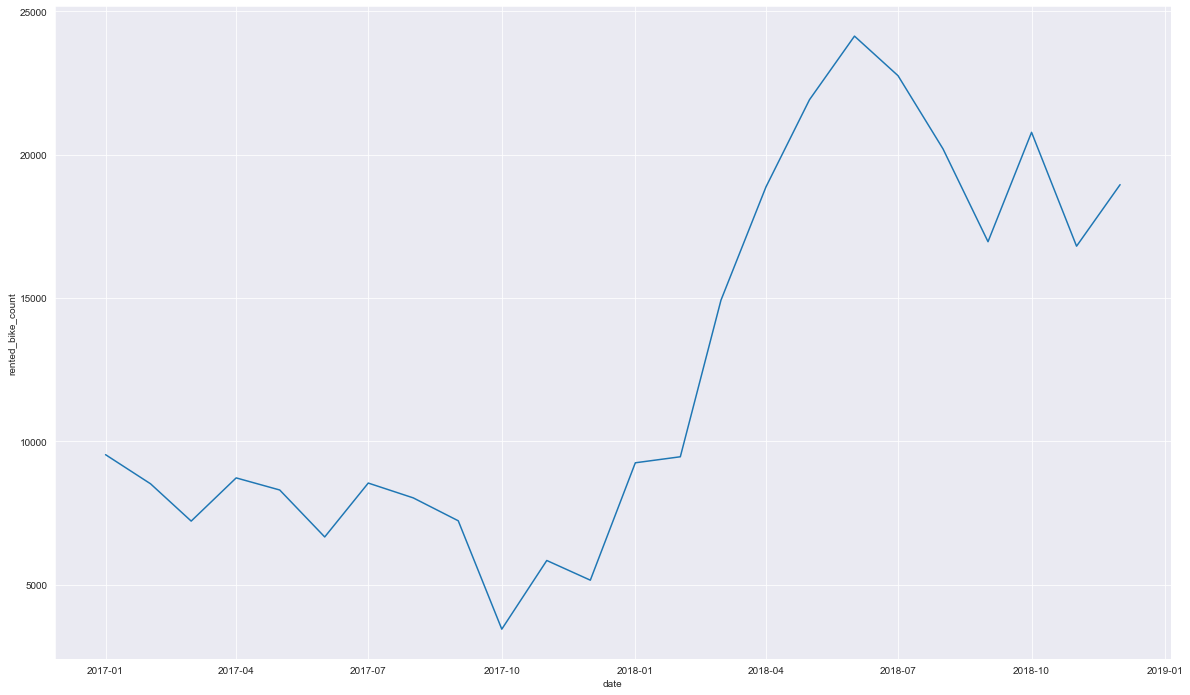

In [12]:
# Analysing daily average - request for the bike

# collecting daily data
hourlyBikeRequest = bikeData[['date', "rented_bike_count"]]
dailyBikeRequest = hourlyBikeRequest.groupby("date", as_index=False).sum()  # as_index=False > don't let the date column as the index of genrating dataframe
dailyBikeRequest["date"] = pd.to_datetime(dailyBikeRequest['date'])
monthlyBikeRequest = dailyBikeRequest

def get_month_year(date):
    return (date.strftime('%B-%Y'))

monthlyBikeRequest['date'] = monthlyBikeRequest["date"].apply(get_month_year)
monthlyAvgBikeRequest = monthlyBikeRequest.groupby('date', as_index=False).mean()
monthlyAvgBikeRequest["rented_bike_count"] = monthlyAvgBikeRequest["rented_bike_count"].apply(int)
monthlyAvgBikeRequest["date"] = pd.to_datetime(monthlyAvgBikeRequest["date"])
monthlyAvgBikeRequest.sort_values("date", inplace=True)

# plot average bike request per month
plt.figure(figsize=(20,12))
sns.set_style('darkgrid')
sns.lineplot(x="date", y="rented_bike_count", data=monthlyAvgBikeRequest, legend='brief')
plt.show()


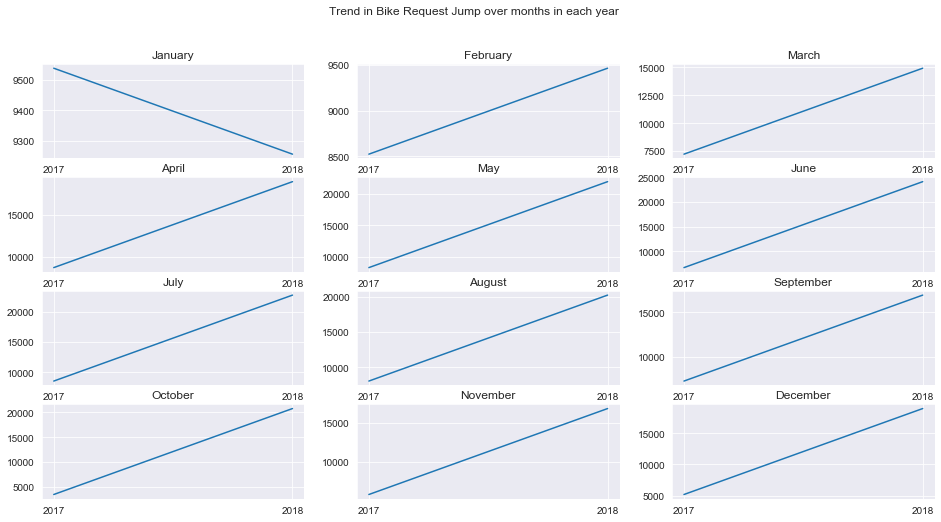

In [13]:
# lets analyse trends in request months in each year
monthlyAvgBikeRequest["month"] = monthlyAvgBikeRequest["date"].apply(lambda date: date.strftime("%B"))
monthlyAvgBikeRequest["year"] = monthlyAvgBikeRequest["date"].apply(lambda date: date.strftime("%Y"))
expandedAvgBikeRequest = monthlyAvgBikeRequest[["month", "year", "rented_bike_count"]]
expandedAvgBikeRequestWide = expandedAvgBikeRequest.pivot("year", "month", "rented_bike_count")

sns.set_style('darkgrid')
fig, axes = plt.subplots(4, 3, figsize=(16,8))
fig.suptitle("Trend in Bike Request Jump over months in each year")

# January
sns.lineplot(ax=axes[0][0],data=expandedAvgBikeRequestWide["January"])
axes[0][0].set_title("January")

# February
sns.lineplot(ax=axes[0][1],data=expandedAvgBikeRequestWide["February"])
axes[0][1].set_title("February")

# March
sns.lineplot(ax=axes[0][2], data=expandedAvgBikeRequestWide["March"])
axes[0][2].set_title("March")

# April
sns.lineplot(ax=axes[1][0], data=expandedAvgBikeRequestWide["April"])
axes[1][0].set_title("April")

# May
sns.lineplot(ax=axes[1][1], data=expandedAvgBikeRequestWide["May"])
axes[1][1].set_title("May")

# June
sns.lineplot(ax=axes[1][2], data=expandedAvgBikeRequestWide["June"])
axes[1][2].set_title("June")

# July
sns.lineplot(ax=axes[2][0], data=expandedAvgBikeRequestWide["July"])
axes[2][0].set_title("July")

# August
sns.lineplot(ax=axes[2][1], data=expandedAvgBikeRequestWide["August"])
axes[2][1].set_title("August")

# September
sns.lineplot(ax=axes[2][2], data=expandedAvgBikeRequestWide["September"])
axes[2][2].set_title("September")

# October
sns.lineplot(ax=axes[3][0], data=expandedAvgBikeRequestWide["October"])
axes[3][0].set_title("October")

# November
sns.lineplot(ax=axes[3][1], data=expandedAvgBikeRequestWide["November"])
axes[3][1].set_title("November")

# December
sns.lineplot(ax=axes[3][2], data=expandedAvgBikeRequestWide["December"])
axes[3][2].set_title("December")

# for ax in axes.flat:
#     ax.label_outer()

plt.show()